# Demo for running CLIP<sup>n</sup>

### 1. Generate simulation data using simulation tools introduced in the manuscript

8 datasets were generated, including 10,000 samples. A total of 10 category labels were used across all datasets, with each individual dataset containing a random subset of five categories. Feature dimensions ranged from 100 to 1,000, noise variance was set between 0.1 to 1, and drop-out rates ranged from 10% to 80%. Random seed was set to 2024 for reproducibility purposes.

### 2. Run CLIP<sup>n</sup> on the generated data

```python
Input: 
    X: python dictionary of features matrices from all datasets
    y: python dictionary of labels from all datasets
    latent_dim: number of latent dimensions
    
Output:
    Z: python dictionary of latent representations from all datasets
```
### 3. Visualize the latent representations using UMAP

In [1]:
import sys

sys.path.append("..")
import functions.simulation as simulation
import matplotlib.pyplot as plt
from clipn import CLIPn
import umap

### Generate simulation data

In [2]:
n_datasets = 8

data = simulation.assay_simulator(
    n_sample=2000,
    n_cluster=10,
    n_assay=n_datasets,
    sigma_max=1,
    sigma_min=0.1,
    rho_max=0.8,
    rho_min=0.1,
    cluster_observe_ratio=0.5,
    random_seed=2023,
)
X = dict()
y = dict()
for i in range(n_datasets):
    X[i] = data["dataset_" + str(i) + "_feature"]
    y[i] = data["dataset_" + str(i) + "_label"]

latent_dim = 10

### Visualize the simulation data

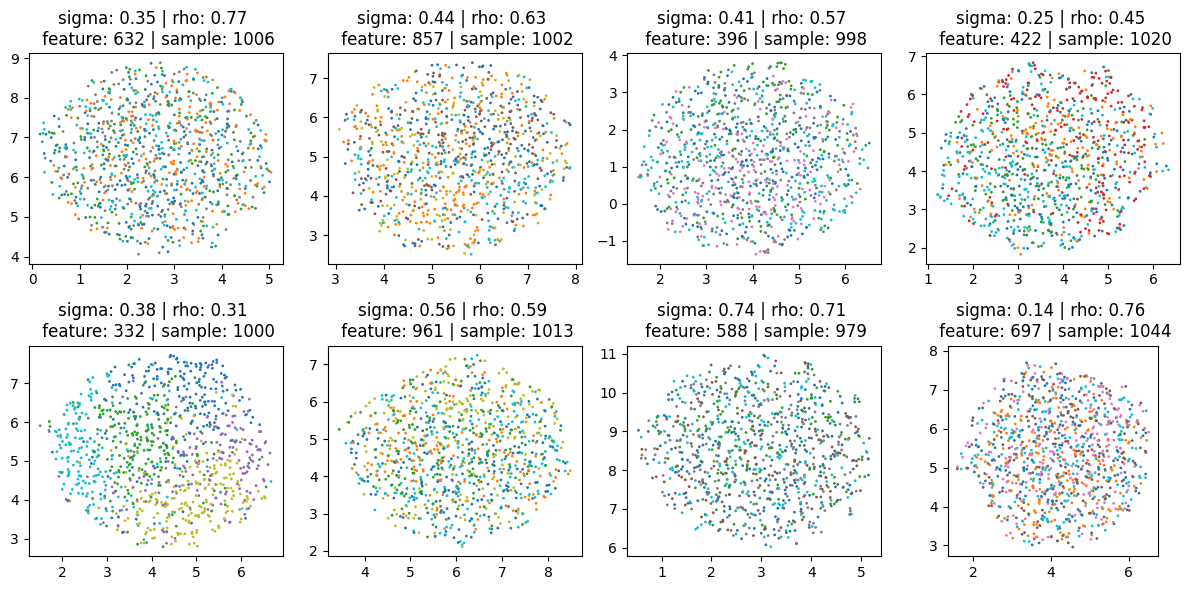

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
k = 0  # figure count

for i in range(2):
    for j in range(4):
        feature = data["dataset_" + str(k) + "_feature"]
        label = data["dataset_" + str(k) + "_label"]
        embed = umap.UMAP().fit_transform(feature)

        sigma = data["dataset_" + str(k) + "_noise"]
        rho = data["dataset_" + str(k) + "_dropout"]

        axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap="tab10", s=1)
        axs[i, j].set_title(
            "sigma: {:.2f} | rho: {:.2f} \n feature: {} | sample: {}".format(
                sigma, rho, feature.shape[1], feature.shape[0]
            )
        )
        plt.axis("square")
        plt.tight_layout()
        k += 1
plt.show()

### Run CLIPn on the generated data

In [4]:
clipn = CLIPn(X, y, latent_dim=latent_dim)
loss = clipn.fit(X, y, lr=1e-5, epochs=100)
z = clipn.predict(X)

Running CLIPn ...


  0%|          | 0/100 [00:00<?, ?it/s]

### Visualize the latent representations using UMAP

/mnt/8tb/fbao/drug__/github/Demo/../functions/helper.py:311: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(
/mnt/8tb/fbao/drug__/github/Demo/../functions/helper.py:325: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(


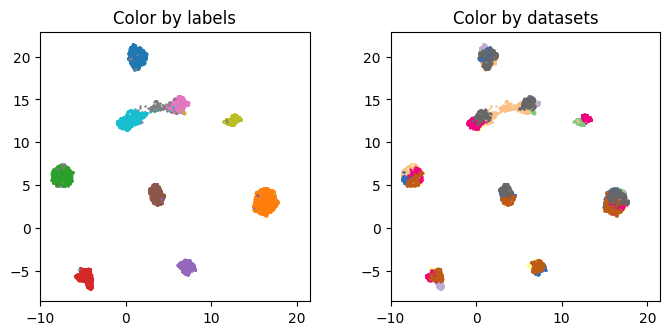

In [5]:
from functions.helper import *

Z = clipn.predict(X)
umap_scatter(Z, y)